# MNIST database

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

**The _MNIST database_ (Modified [National Institute of Standards and Technology](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology "National Institute of Standards and Technology") database of handwritten digits that is commonly used for [training](https://en.wikipedia.org/wiki/Training_set "Training set") various [image processing](https://en.wikipedia.org/wiki/Image_processing "Image processing") systems. The database is also widely used for training and testing in the field of [machine learning](https://en.wikipedia.org/wiki/Machine_learning "Machine learning"). It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American [Census Bureau](https://en.wikipedia.org/wiki/United_States_Census_Bureau "United States Census Bureau") employees, while the testing dataset was taken from [American](https://en.wikipedia.org/wiki/Americans "Americans") [high school](https://en.wikipedia.org/wiki/High_school "High school") students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were [normalized](https://en.wikipedia.org/wiki/Normalization_(image_processing) "Normalization (image processing)") to fit into a 28x28 pixel bounding box and [anti-aliased](https://en.wikipedia.org/wiki/Spatial_anti-aliasing "Spatial anti-aliasing"), which introduced grayscale levels.**

[![MNIST sample images](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)](https://en.wikipedia.org/wiki/File:MnistExamples.png)


In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Load Data & Preprocess

**Since we are not using Tensor Flow/Keras, you will need to download the digit MNIST dataset to be able to run this notebook (_sorry...but Github has a cap of 100 MB max file sizes, and the training dataset of digit MNIST is around 140 MB_).**

**However, you can easily download the [mnist_train.csv](https://drive.google.com/uc?export=download&id=1OpgJOUnQEcTsLqH-t1t57INHtday4Ngm) and [mnist_test.csv](https://drive.google.com/uc?export=download&id=1OpgJOUnQEcTsLqH-t1t57INHtday4Ngm) through these links.**

**Train_mnist comes whit 60000 samples and test_mnist with 10000, both with features (784) and labels.**

**Create a folder called `data_mnist` and place the downloaded files in it, and you are ready to start!**


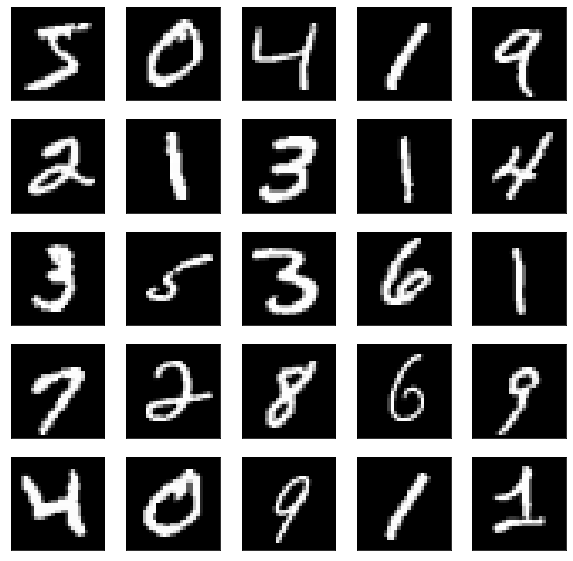

In [2]:
train = pd.read_csv('data_mnist\mnist_train.csv')
test = pd.read_csv('data_mnist\mnist_test.csv')
x_train, y_train = np.array(
    train[train.columns.to_list()[1:]]).T, np.array(train['label'])
x_test, y_test = np.array(
    test[test.columns.to_list()[1:]]).T, np.array(test['label'])
n, m = x_train.shape
x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(x_train[:, i, None].reshape(
        (28, 28)) * 255, interpolation='nearest')
plt.show()


### Neural (Numpy) Network

- The input layer $a_{0}$ has 784 units (784 pixels = 2D image 28x28);
- $a_{0}$ = 784 , $a_{1}$ = 10, $a_{2}$ = 10 ;
- initial parameters between -0.5 and 0.5
- 10 nodes in the hidden layer;
- 10 nodes in the output layer (10 digits);
- $W$ = weigths $((10 \times 784) + (10 \times 10) = 7940)$, $b$ = bias $(10 + 10 = 20)$.


In [3]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


### ReLU - Rectified Linear Unit

```python

if x > 0:
   x = x
else:
   x = 0

```


In [4]:
def ReLU(Z):
    return np.maximum(Z, 0)


### Softmax - normalized exponential function

$$Pr(x_{0}) =  \frac{e^{x_{0}}}{e^{x_{0}} + e^{x_{1}} + e^{x_{2}} ... + e^{x_{n}}}$$


In [6]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


### Forward Propagation

- $w_{1}$ = parameters between $a_{0}$ and $a_{1}$.
- $b_{1}$ = bias of $w_{1}$.
- $w_{2}$ = parameters between $a_{0}$ and $a_{1}$.
- $b_{2}$ = bias of $w_{2}$ (parameters are associated with connections, bias to nodes).
- $z_{1}$ = scalar product of the input signal $a_{0}$ (784 = 28x28) with $w_{1} + b_{1} = [w_{1} \cdot x_{1} + w_{2} \cdot x_{2} ... w_{784} \cdot x_{784}] + b_{1}$.
- $a_{1}$ = ReLU($z_{1}$).
- $z_{2}$ = the scalar product of $a_{1}$ with $w_{2}$ + $b_{2}$.
- $a_{2}$ = softmax($z_{2}$).


In [7]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


### Derivative (_slope of the line tangent to the function at any point in the function_) of ReLU

```python

if x > 0:
   x = 1
else:
   x = 0

```


In [8]:
def ReLU_derivative(Z):
    return Z > 0


### `one_hot_encoding()`

**Transforms categorical labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] into sparse binary vectors:**

```python

- '0' = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- '1' = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- '2' = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
.
.
.
- '9' = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

```


In [9]:
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


### Backward Propagation

- $dz_{2}$ = (what was predicted, $a_{2}$) $-$ (the correct category)
- $dw_{2}$ = $\frac{1}{60000} \times (dz_{2} \cdot a_{1})$
- $db_{2}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{2}$
- $dz_{1}$ = $w_{2} \cdot dz_{2} \times dReLU(z_{1})$
- $dw_{1}$ = $\frac{1}{60000} \times (dz_{1} \cdot x)$
- $db_{1}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{1}$


In [10]:
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


### Update Parameters

_Note: alpha (learning rate) is the optimizer's step size._

- $w_{1} = w_{1} - (\alpha \times dw_{1})$
- $b_{1} = b_{1} - (\alpha \times db_{1})$
- $w_{2} = w_{2} - (\alpha \times dw_{2})$
- $b_{2} = b_{2} - (\alpha \times db_{2})$  



In [11]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


### Predictions and Accuracy


In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


### Gradient Descent


In [23]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0 or i == 0:
            print('Epoch: ', i)
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f'Accuracy: {round(acc * 100, 2)}\n')
            print(f'First Layer (distribution of values among parameters)\n')
            fig = plt.figure(figsize=(10, 10))
            fig.set_figheight(20)
            fig.set_figwidth(40)
            for i in range(10):
                plt.subplot(5, 5, i+1)
                plt.title(f'Neuron {i}')
                plt.style.use('ggplot')
                plt.hist(W1[i], bins=20, color="blue", ec="black")
            plt.show()
            print(f'\nSecond Layer (distribution of values among parameters)\n')
            fig = plt.figure(figsize=(10, 10))
            fig.set_figheight(20)
            fig.set_figwidth(40)
            for i in range(10):
                plt.subplot(5, 5, i+1)
                plt.title(f'Neuron {i}')
                plt.style.use('ggplot')
                plt.hist(W2[i], bins=10, color="red", ec="black")
            plt.show()
    return W1, b1, W2, b2


Epoch:  0
[6 5 5 ... 8 8 0] [5 0 4 ... 5 6 8]
Accuracy: 12.15

First Layer (distribution of values among parameters)



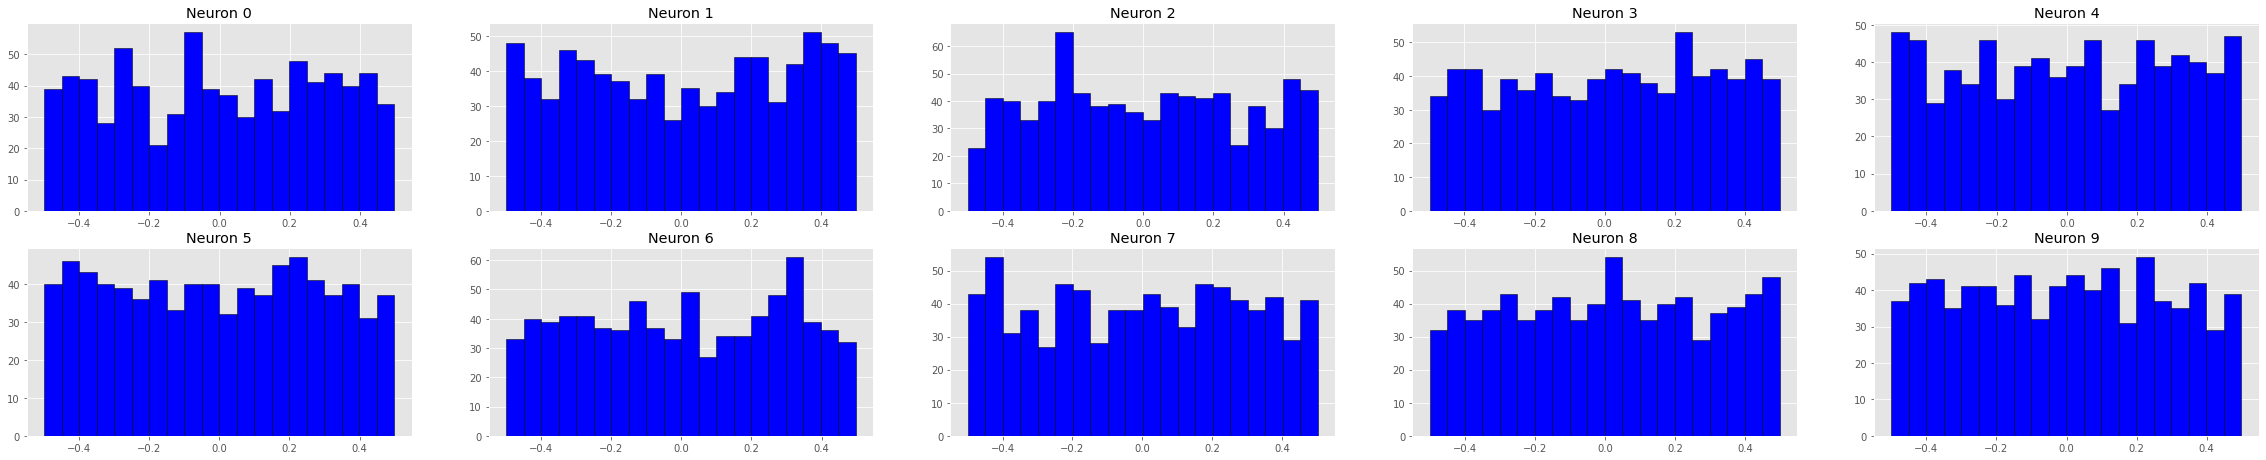


Second Layer (distribution of values among parameters)



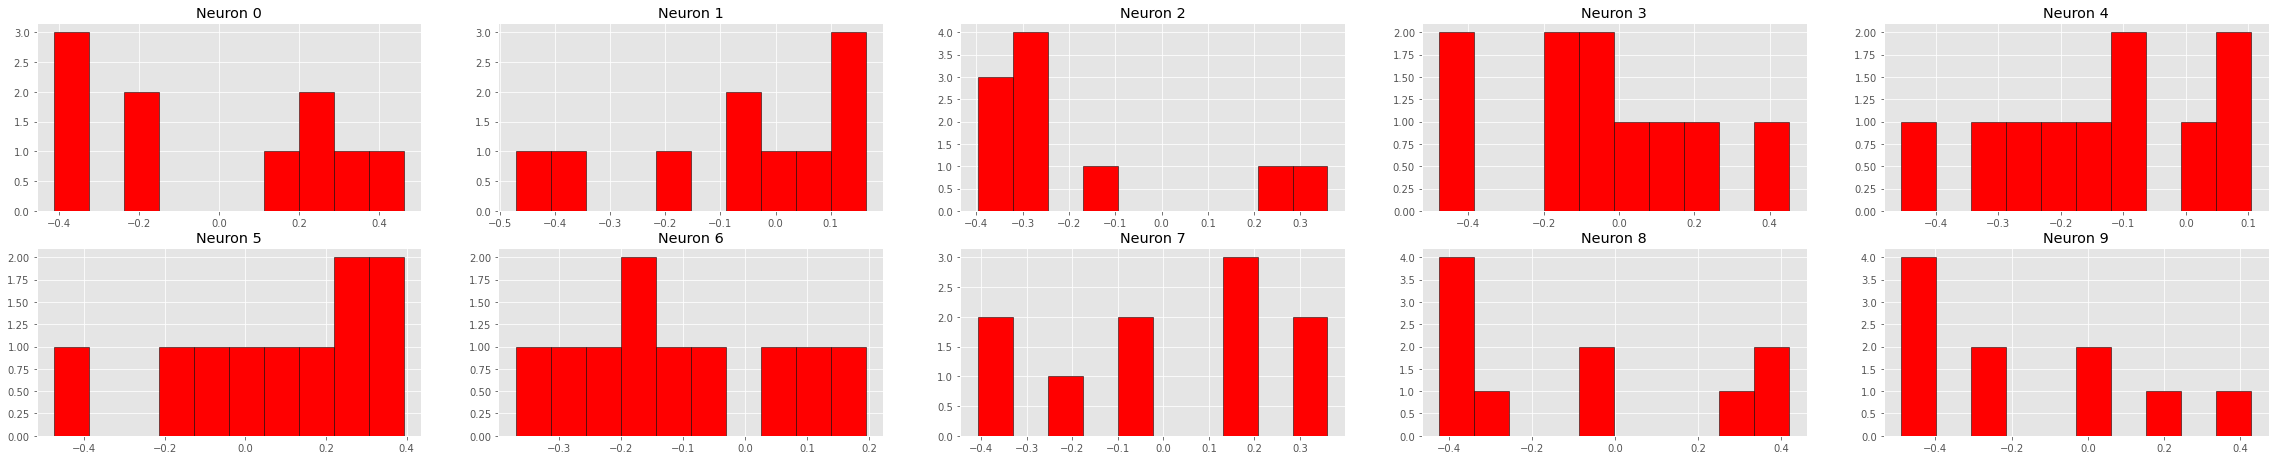

Epoch:  100
[5 0 6 ... 8 6 0] [5 0 4 ... 5 6 8]
Accuracy: 68.29

First Layer (distribution of values among parameters)



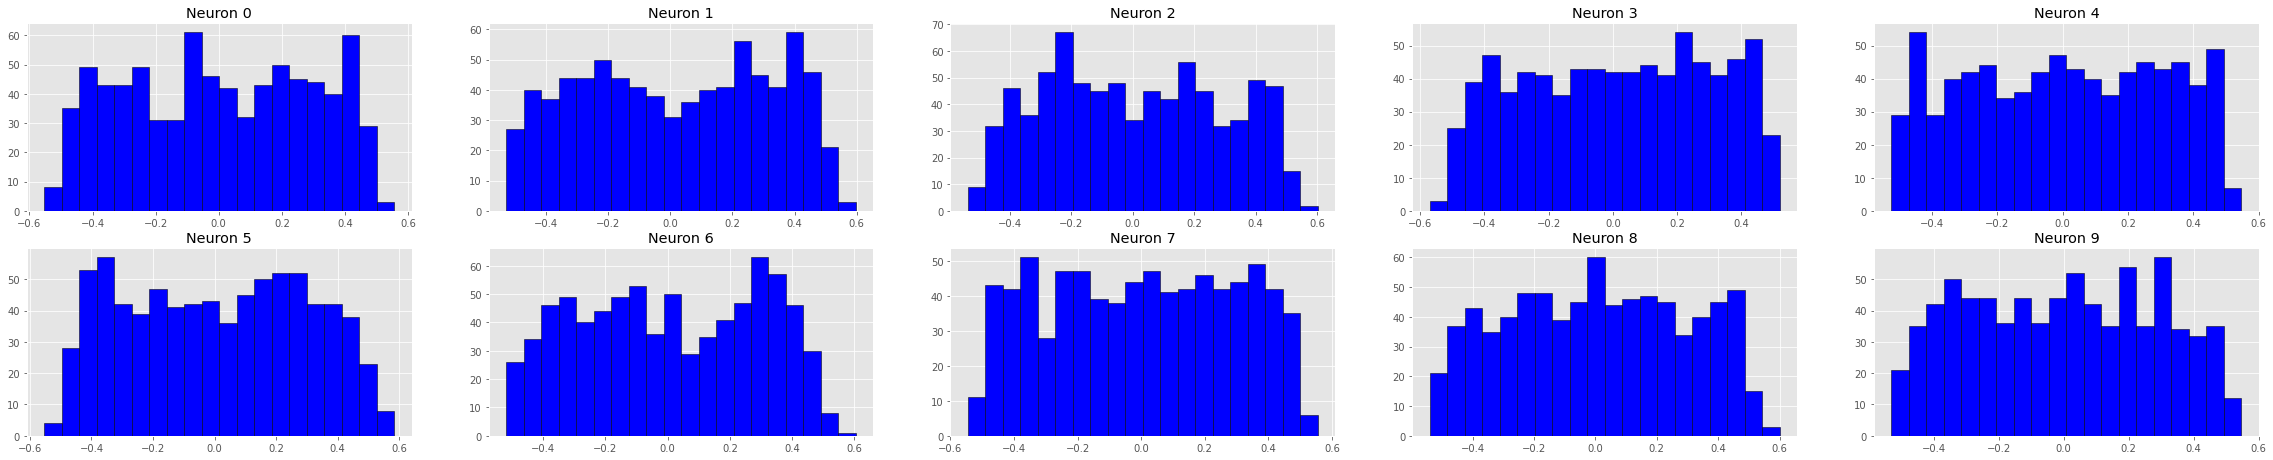


Second Layer (distribution of values among parameters)



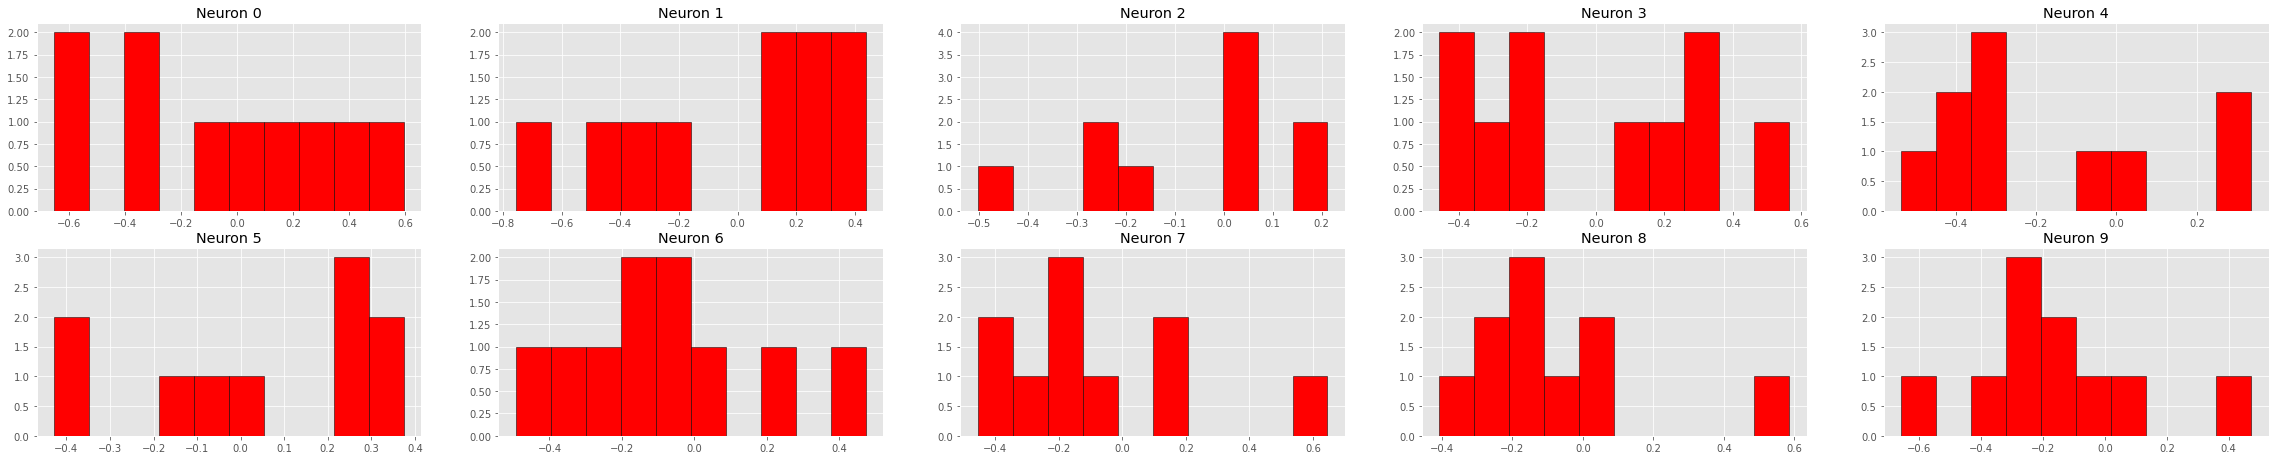

Epoch:  200
[5 0 4 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy: 78.06

First Layer (distribution of values among parameters)



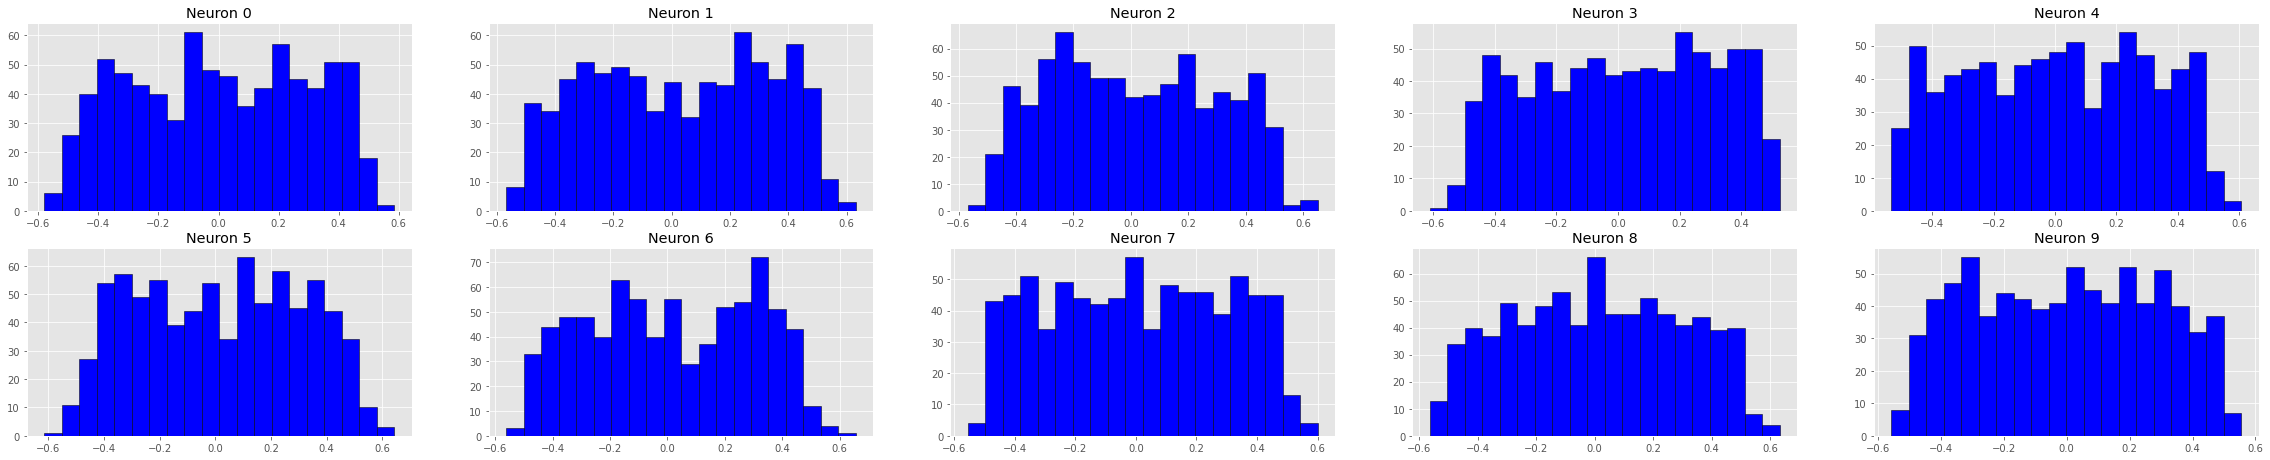


Second Layer (distribution of values among parameters)



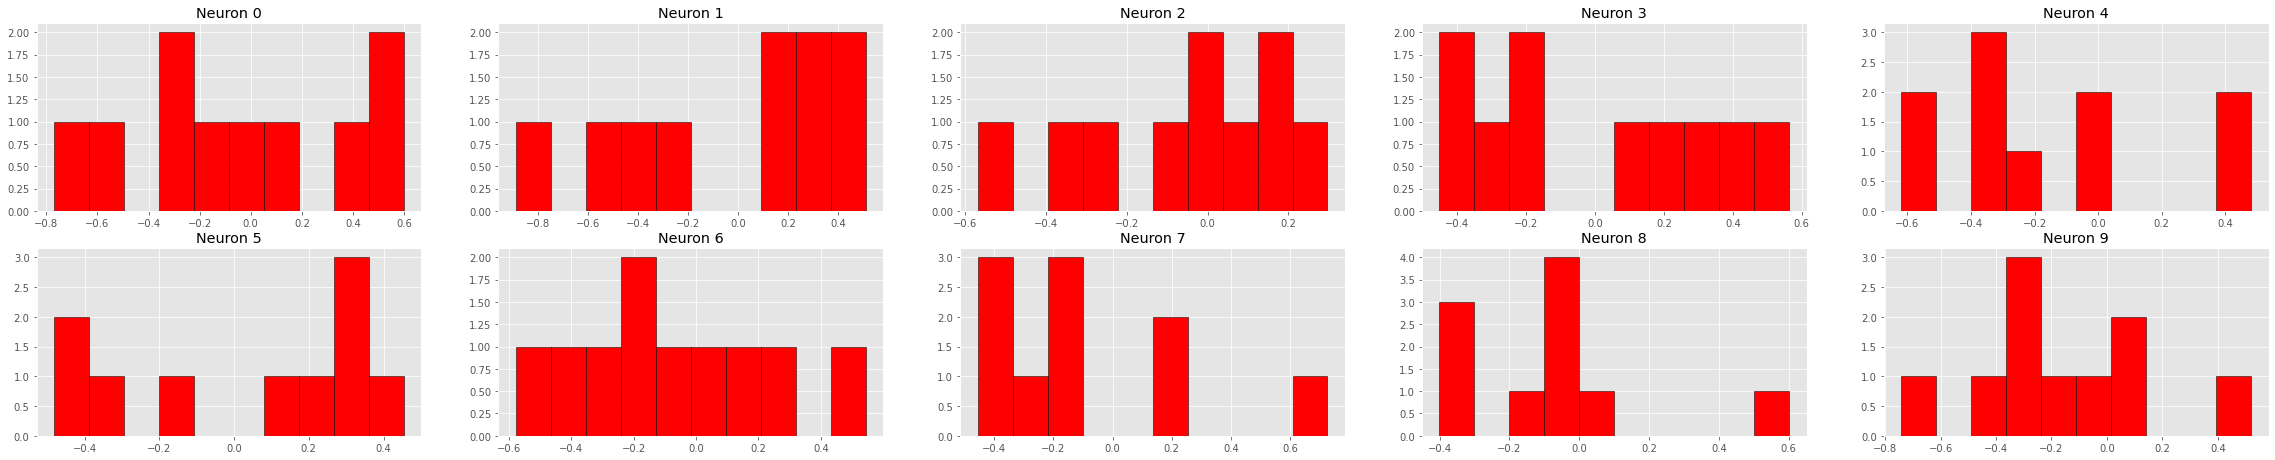

Epoch:  300
[5 0 4 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy: 81.92

First Layer (distribution of values among parameters)



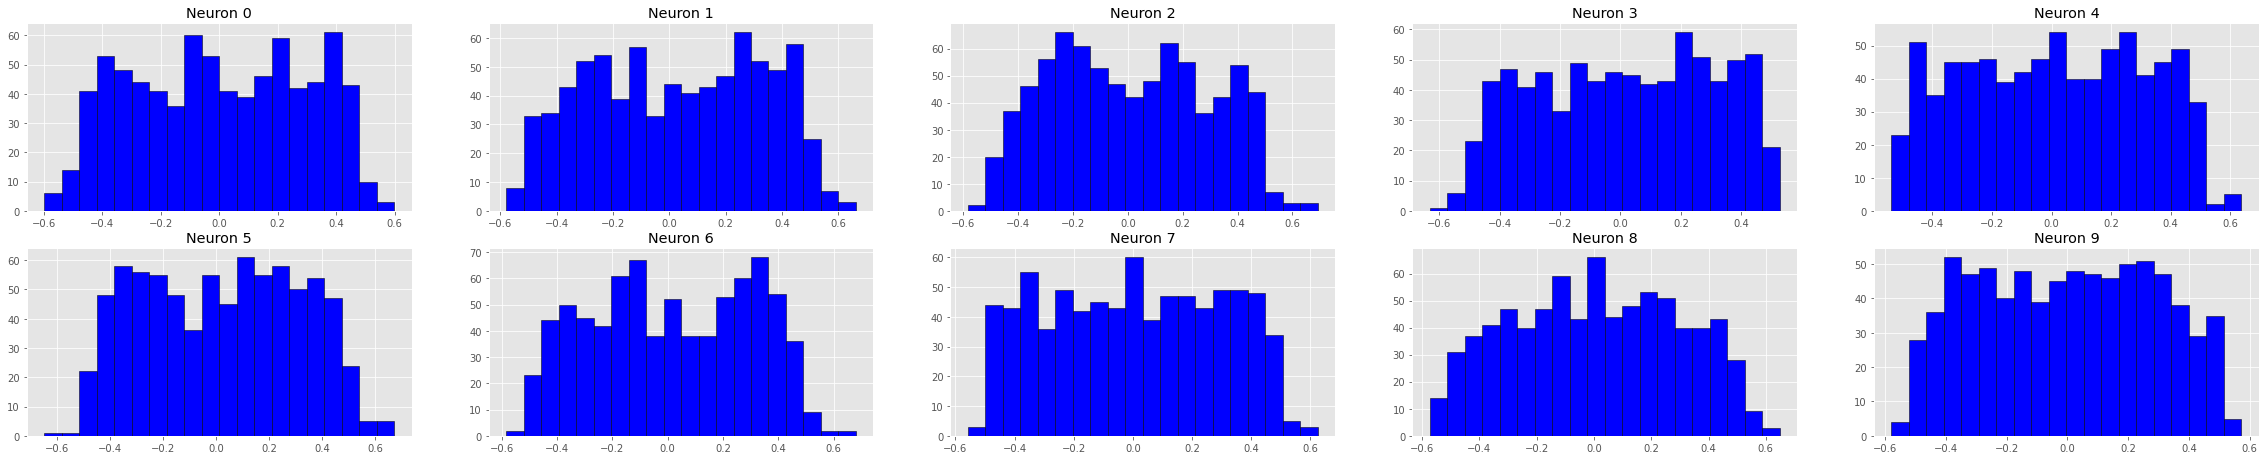


Second Layer (distribution of values among parameters)



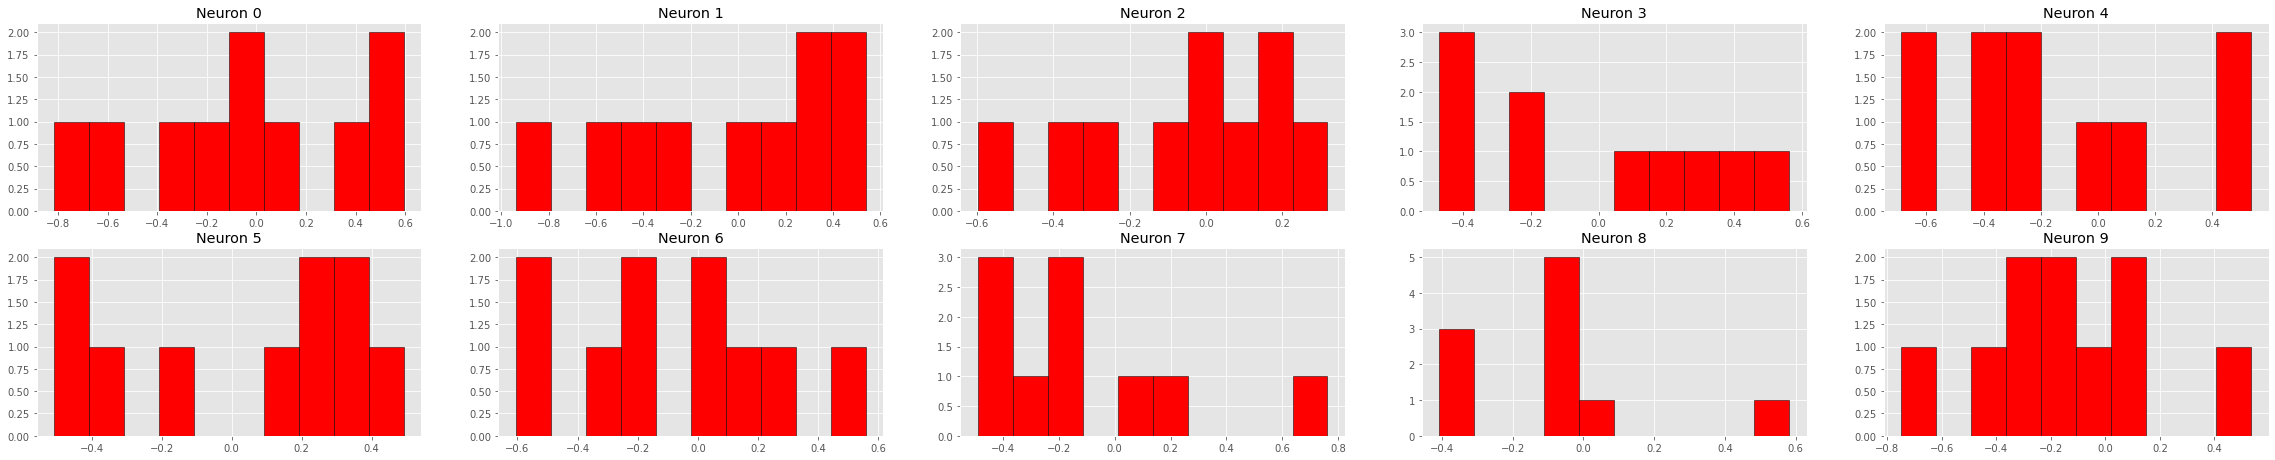

Epoch:  400
[5 0 4 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy: 83.98

First Layer (distribution of values among parameters)



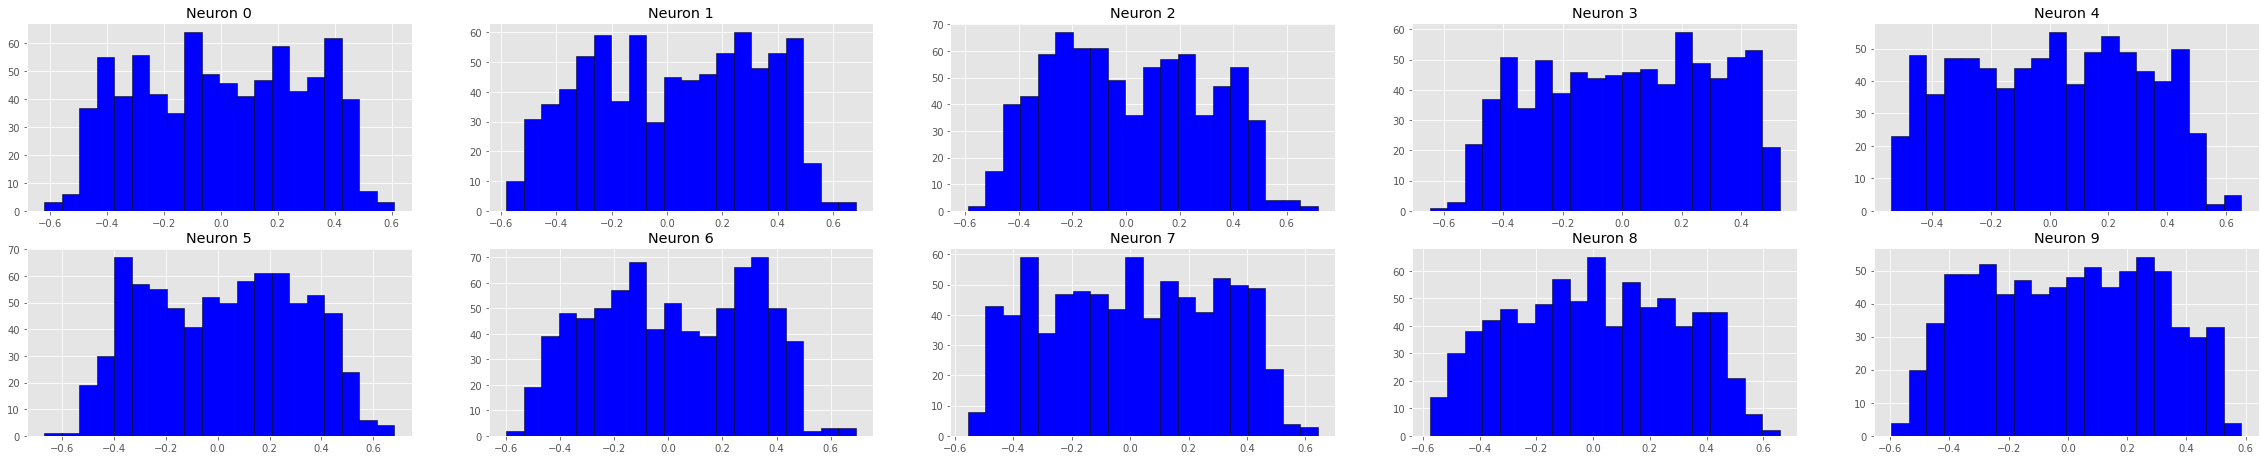


Second Layer (distribution of values among parameters)



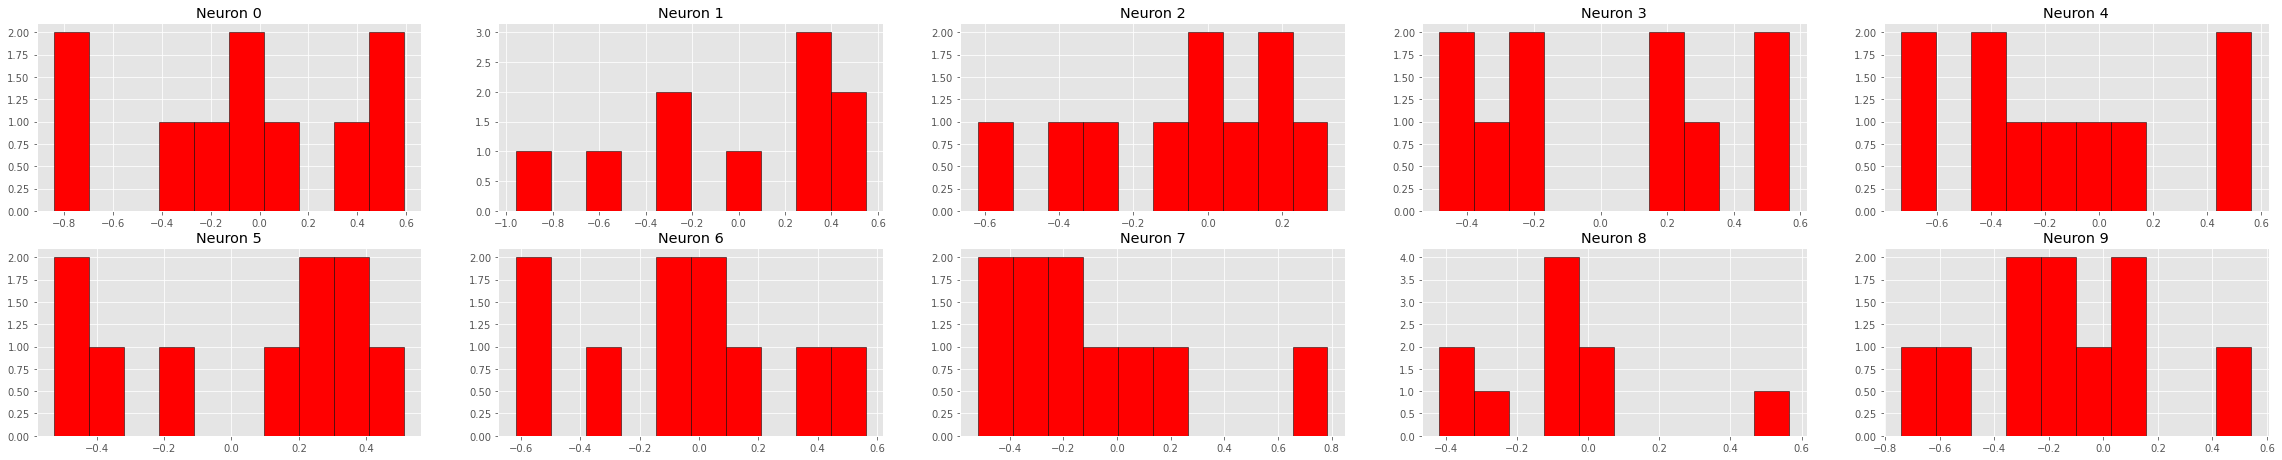

In [24]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)


### Evaluation


Predicted Label:  [8]
True Label:  8


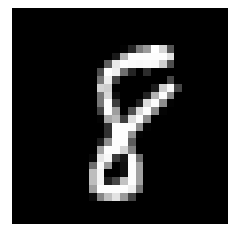

Predicted Label:  [5]
True Label:  5


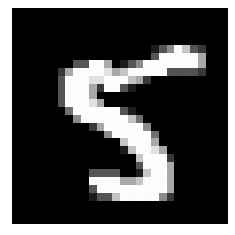

Predicted Label:  [0]
True Label:  0


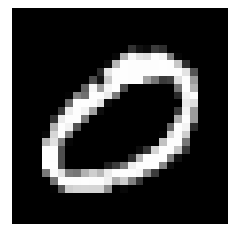

Predicted Label:  [8]
True Label:  8


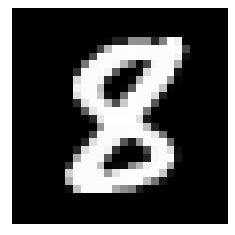

Predicted Label:  [6]
True Label:  6


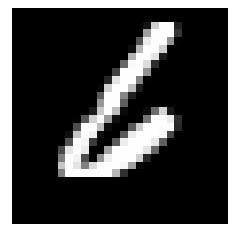

Predicted Label:  [1]
True Label:  1


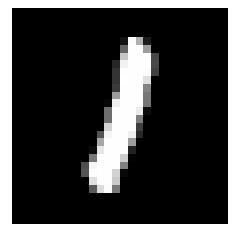

Predicted Label:  [4]
True Label:  4


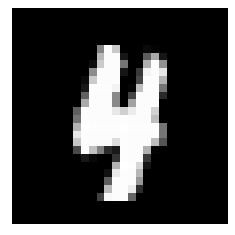

Predicted Label:  [0]
True Label:  0


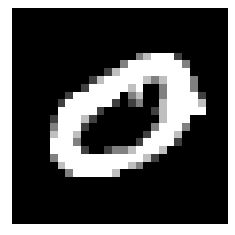

Predicted Label:  [3]
True Label:  3


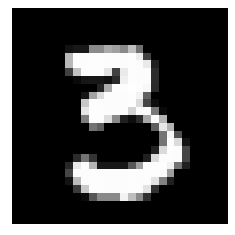

Predicted Label:  [0]
True Label:  0


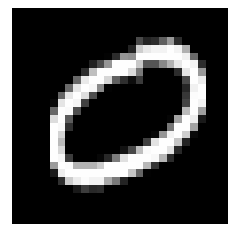

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Accuracy in test: 85.72 %


In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print('Predicted Label: ', prediction)
    print('True Label: ', label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


for i in range(10):
    test_prediction(random.randint(0, 9999), W1, b1, W2, b2)

predictions = make_predictions(x_test, W1, b1, W2, b2)
print(
    f'Accuracy in test: {round(get_accuracy(predictions, y_test) * 100, 2)} %')


**Congratulations, you have just implemented a neural network using only linear algebra!** 🙃

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
